## Fraud Transaction Detection

In [5]:
import numpy as np
import pandas as pd

##### WRANGLING

In [4]:
transaction_data = pd.read_csv("C:/Users/Asus/Downloads/Fraud (1).csv")

In [3]:
print(transaction_data )

         step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282

In [6]:
transaction_data.shape

(6362620, 11)

In [7]:
transaction_data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [8]:
transaction_data.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


##### ANALYSING THE DATA

In [9]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
transaction_data.isnull().values.any()

False

In [11]:
transaction_data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [12]:
legit = len(transaction_data[transaction_data.isFraud == 0])
fraud = len(transaction_data[transaction_data.isFraud == 1])
legit_transaction_percentage = (legit / (fraud + legit)) * 100
fraud_transaction_percentage = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_transaction_percentage))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_transaction_percentage))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


##### DATA VISUALISATION

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

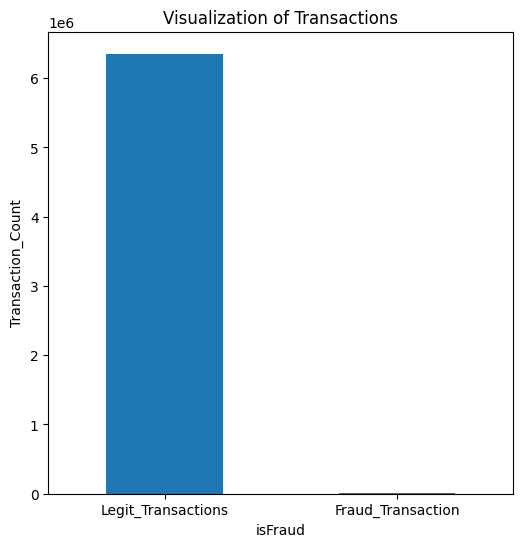

In [14]:
plt.figure(figsize=(6,6))
labels = ["Legit_Transactions", "Fraud_Transaction"]
count_classes = transaction_data.value_counts(transaction_data['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Transactions")
plt.ylabel("Transaction_Count")
plt.xticks(range(2), labels)
plt.show()

##### PROBLEM SOLVING

In [15]:
new_dataset=transaction_data.copy()
new_dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [16]:
new_List = new_dataset.select_dtypes(include = "object").columns
print ("Variables with datatype - 'object' are:")
print (new_List)

Variables with datatype - 'object' are:
Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [18]:
label_encode = LabelEncoder()

for i in new_List:
    new_dataset[i] = label_encode.fit_transform(new_dataset[i].astype(str))

print (new_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


#### Multicolinearity Checking

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
def calc_vif(transaction_data):

    # Calculating Variance Inflation Factor
    vif = pd.DataFrame()
    vif["Variables"] = transaction_data.columns
    vif["VIF"] = [variance_inflation_factor(transaction_data.values, i) for i in range(transaction_data.shape[1])]

    return(vif)

calc_vif(new_dataset)

,Variables,VIF
0,step,3.221074
1,type,2.556676
2,amount,4.110298
3,nameOrig,3.236811
4,oldbalanceOrg,574.777410
5,newbalanceOrig,580.814577
6,nameDest,3.595660
7,oldbalanceDest,73.554341
8,newbalanceDest,85.139876
9,isFraud,1.195846


In [21]:
new_dataset['balance_orig'] = new_dataset.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_dataset['balance_dest'] = new_dataset.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_dataset['name'] = new_dataset.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#dropping columns
new_dataset = new_dataset.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','nameOrig','nameDest'],axis=1)

calc_vif(new_dataset)

,Variables,VIF
0,step,3.030439
1,type,2.429987
2,amount,3.927651
3,isFraud,1.190485
4,isFlaggedFraud,1.002579
5,balance_orig,1.335000
6,balance_dest,3.797135
7,name,3.338309


<Axes: >

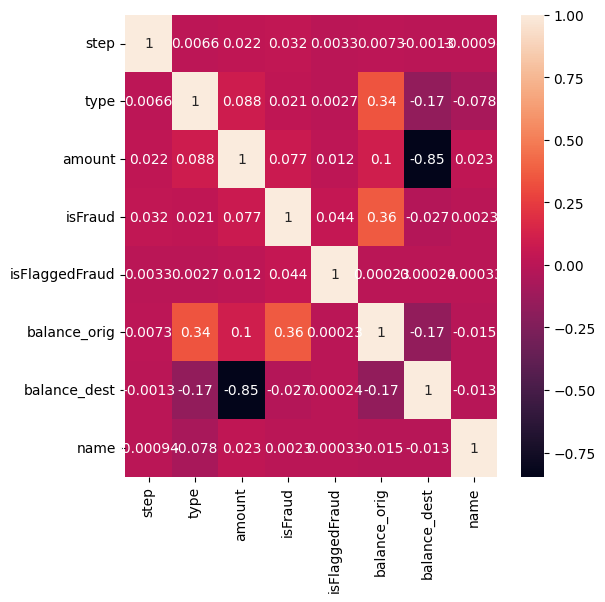

In [22]:
corr=new_dataset.corr()

plt.figure(figsize=(6,6))
sns.heatmap(corr,annot=True)

#### Model Building

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [24]:
X = new_dataset.drop(columns='isFraud', axis=1)
Y = new_dataset['isFraud']

In [25]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 7)
Shape of X_test:  (1908786, 7)


#### Model Training

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [ ]:
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)

Y_pred_lr = logistic_regression.predict(X_test)
logistic_regression_score = logistic_regression.score(X_test, Y_test) * 100

#### Evaluation

In [ ]:
print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)
print("Logistic Regression Score: ", logistic_regression_score)

In [ ]:
classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report for Decision Tree:")
print(classification_report_dt)

# Random Forest

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report for Random Forest:")
print(classification_report_rf)

# Logistic Regression

classification_report_lr = classification_report(Y_test, Y_pred_lr)
print("Classification Report for Logistic Regression:")
print(classification_report_lr)

#### CONCLUSION

We can see the Accuracy of Decision Tree and Random Forest is almost same. Precision is a crucial factor to predict correctly. The Precision and f1-score for Random Forest is way better than other two. So, Random Forest is the best option. There is no way of taking Logistic regression.

With the help of Correlation Heatmap, we have selected the variables.

Source of the transaction request,legitimacy of the requesting

organisation/individual could be the key factors to predict fraudulent customer.

verified software, usage of VPN, keeping contact with bank, keep updated

software on mobile/pc, using secure websites can prevent this kind of transactions

